# Fetching Data from Coin Market Cap webpage for latest data updated every 30 seconds (https://pro.coinmarketcap.com/account/) 

market_cap: CoinMarketCap's market cap rank as outlined in our methodology.
market_cap_strict: A strict market cap sort (latest trade price x circulating supply).
name: The cryptocurrency name.
symbol: The cryptocurrency symbol.
date_added: Date cryptocurrency was added to the system.
price: latest average trade price across markets.
circulating_supply: approximate number of coins currently in circulation.
total_supply: approximate total amount of coins in existence right now (minus any coins that have been verifiably burned).
max_supply: our best approximation of the maximum amount of coins that will ever exist in the lifetime of the currency.
num_market_pairs: number of market pairs across all exchanges trading each currency.
market_cap_by_total_supply_strict: market cap by total supply.
volume_24h: rolling 24 hour adjusted trading volume.
volume_7d: rolling 24 hour adjusted trading volume.
volume_30d: rolling 24 hour adjusted trading volume.
percent_change_1h: 1 hour trading price percentage change for each currency.
percent_change_24h: 24 hour trading price percentage change for each currency.
percent_change_7d: 7 day trading price percentage change for each currency.

Data from research
Proof of Reputation works on the basis of validating nodes being required to have a certain reputation in order to have power over validating new blocks and transactions. That means the participating block signer would face financial consequences in the case of him cheating the system. This ensures better security and is far more green than PoW and etc.

Secure Proof of Stake (SPOS) is a consensus mechanism that is exclusively used by Elrond Network. It ensures the blockchain is able to achieve near linear scalability by allowing eased access to nodes sourced from virtually any household, without compromising network security.

In [62]:
# import libraries
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from coinmarket_config import API_Key
from cryptocompare_config import API_Key
import numpy as np
import pymongo
from pymongo import MongoClient
import certifi
from mongo2_config import mongo_uri
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
# %matplotlib notebook
import datetime
from datetime import datetime
from datetime import timezone
import seaborn as sns

In [4]:
api_endpoint = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest?CMC_PRO_API_KEY='
api_endpoint += API_Key

In [5]:
requests.get(api_endpoint).json()

{'status': {'timestamp': '2022-01-30T01:05:57.401Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 27,
  'credit_count': 1,
  'notice': None,
  'total_count': 9281},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 9121,
   'date_added': '2013-04-28T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio'

In [6]:
data_retrieved = requests.get(api_endpoint).json()
data_retrieved

{'status': {'timestamp': '2022-01-30T01:05:57.864Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 41,
  'credit_count': 1,
  'notice': None,
  'total_count': 9281},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'slug': 'bitcoin',
   'num_market_pairs': 9121,
   'date_added': '2013-04-28T00:00:00.000Z',
   'tags': ['mineable',
    'pow',
    'sha-256',
    'store-of-value',
    'state-channel',
    'coinbase-ventures-portfolio',
    'three-arrows-capital-portfolio',
    'polychain-capital-portfolio',
    'binance-labs-portfolio',
    'blockchain-capital-portfolio',
    'boostvc-portfolio',
    'cms-holdings-portfolio',
    'dcg-portfolio',
    'dragonfly-capital-portfolio',
    'electric-capital-portfolio',
    'fabric-ventures-portfolio',
    'framework-ventures-portfolio',
    'galaxy-digital-portfolio',
    'huobi-capital-portfolio',
    'alameda-research-portfolio',
    'a16z-portfolio',
    '1confirmation-portfolio',
    'winklevoss-capital-portfolio'

In [7]:
cryptodata = data_retrieved['data']

In [8]:
cryptodata

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 9121,
  'date_added': '2013-04-28T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_supply': 21000000,
  'circulating_supply': 18943556,
  '

# Converting the json data into a Dataframe

In [9]:
crypto_data_df = pd.json_normalize(data_retrieved, record_path =['data'])
crypto_data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9121,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.894356e+07,1.894356e+07,...,-38.596519,7.169646e+11,41.6303,7.947956e+11,2022-01-30T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5482,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.193663e+08,1.193663e+08,...,-40.483575,3.069712e+11,17.8302,3.069712e+11,2022-01-30T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,27161,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.811743e+10,8.007489e+10,...,0.008823,7.814068e+10,4.5482,8.009873e+10,2022-01-30T01:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,663,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,1.651168e+08,...,-27.136044,6.360614e+10,3.7022,6.360614e+10,2022-01-30T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,2895,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.968239e+10,4.968239e+10,...,0.052572,4.968031e+10,2.8847,4.968031e+10,2022-01-30T01:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2634,XDC Network,XDC,xinfin,50,2018-04-12T00:00:00.000Z,[],NaN,1.230501e+10,3.770501e+10,...,-42.157463,7.470191e+08,0.0434,2.289016e+09,2022-01-30T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN
96,2577,Ravencoin,RVN,ravencoin,93,2018-03-10T00:00:00.000Z,"[mineable, pow, platform, crowdfunding]",2.100000e+10,1.047329e+10,1.047329e+10,...,-42.224119,7.369404e+08,0.0429,1.477640e+09,2022-01-30T01:04:00.000Z,NaN,NaN,NaN,NaN,NaN
97,1808,OMG Network,OMG,omg,264,2017-07-14T00:00:00.000Z,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,1.402454e+08,...,-65.775675,6.718303e+08,0.0390,6.718303e+08,2022-01-30T01:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xd26114cd6ee289accf82350c8d8487fedb8a0c07
98,5777,renBTC,RENBTC,renbtc,38,2020-06-28T00:00:00.000Z,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.369800e+04,1.753642e+04,1.753642e+04,...,-38.447242,6.649548e+08,0.0387,5.194076e+08,2022-01-30T01:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xeb4c2781e4eba804ce9a9803c67d0893436bb27d


In [10]:
# Replace NaN as '0'
crypto_data_df.isnull().sum().sum()
crypto_data_df.isna().sum()

id                                      0
name                                    0
symbol                                  0
slug                                    0
num_market_pairs                        0
date_added                              0
tags                                    0
max_supply                             41
circulating_supply                      0
total_supply                            0
platform                              100
cmc_rank                                0
self_reported_circulating_supply       88
self_reported_market_cap               88
last_updated                            0
quote.USD.price                         0
quote.USD.volume_24h                    0
quote.USD.volume_change_24h             0
quote.USD.percent_change_1h             0
quote.USD.percent_change_24h            0
quote.USD.percent_change_7d             0
quote.USD.percent_change_30d            0
quote.USD.percent_change_60d            0
quote.USD.percent_change_90d      

In [11]:
# change data to datetime format
crypto_data_df['date_added'] = pd.to_datetime(crypto_data_df['date_added']).dt.tz_localize(None)
crypto_data_df['quote.USD.last_updated'] = pd.to_datetime(crypto_data_df['quote.USD.last_updated']).dt.tz_localize(None)
crypto_data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9121,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.894356e+07,1.894356e+07,...,-38.596519,7.169646e+11,41.6303,7.947956e+11,2022-01-30 01:04:00,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5482,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.193663e+08,1.193663e+08,...,-40.483575,3.069712e+11,17.8302,3.069712e+11,2022-01-30 01:04:00,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,27161,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.811743e+10,8.007489e+10,...,0.008823,7.814068e+10,4.5482,8.009873e+10,2022-01-30 01:04:00,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,663,2017-07-25,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,1.651168e+08,...,-27.136044,6.360614e+10,3.7022,6.360614e+10,2022-01-30 01:04:00,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,2895,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.968239e+10,4.968239e+10,...,0.052572,4.968031e+10,2.8847,4.968031e+10,2022-01-30 01:04:00,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2634,XDC Network,XDC,xinfin,50,2018-04-12,[],NaN,1.230501e+10,3.770501e+10,...,-42.157463,7.470191e+08,0.0434,2.289016e+09,2022-01-30 01:04:00,NaN,NaN,NaN,NaN,NaN
96,2577,Ravencoin,RVN,ravencoin,93,2018-03-10,"[mineable, pow, platform, crowdfunding]",2.100000e+10,1.047329e+10,1.047329e+10,...,-42.224119,7.369404e+08,0.0429,1.477640e+09,2022-01-30 01:04:00,NaN,NaN,NaN,NaN,NaN
97,1808,OMG Network,OMG,omg,264,2017-07-14,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,1.402454e+08,...,-65.775675,6.718303e+08,0.0390,6.718303e+08,2022-01-30 01:04:00,1027.0,Ethereum,ETH,ethereum,0xd26114cd6ee289accf82350c8d8487fedb8a0c07
98,5777,renBTC,RENBTC,renbtc,38,2020-06-28,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.369800e+04,1.753642e+04,1.753642e+04,...,-38.447242,6.649548e+08,0.0387,5.194076e+08,2022-01-30 01:04:00,1027.0,Ethereum,ETH,ethereum,0xeb4c2781e4eba804ce9a9803c67d0893436bb27d


In [12]:
# Drop columns that have null values as those columns are irrelevant
final_crypto_data_df = crypto_data_df.dropna(axis=1)
final_crypto_data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,cmc_rank,...,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated
0,1,Bitcoin,BTC,bitcoin,9121,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",1.894356e+07,1.894356e+07,1,...,-0.769884,0.130294,7.082843,-19.630164,-34.273526,-38.596519,7.169646e+11,41.6303,7.947956e+11,2022-01-30 01:04:00
1,1027,Ethereum,ETH,ethereum,5482,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",1.193663e+08,1.193663e+08,2,...,-0.968180,0.522745,5.168175,-30.574656,-45.539721,-40.483575,3.069712e+11,17.8302,3.069712e+11,2022-01-30 01:04:00
2,825,Tether,USDT,tether,27161,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",7.811743e+10,8.007489e+10,3,...,-0.020528,-0.018010,-0.003358,-0.024635,-0.052111,0.008823,7.814068e+10,4.5482,8.009873e+10,2022-01-30 01:04:00
3,1839,BNB,BNB,bnb,663,2017-07-25,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.651168e+08,4,...,-0.836379,-0.703239,5.175674,-25.589079,-38.741638,-27.136044,6.360614e+10,3.7022,6.360614e+10,2022-01-30 01:04:00
4,3408,USD Coin,USDC,usd-coin,2895,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",4.968239e+10,4.968239e+10,5,...,-0.034151,0.021299,-0.068358,-0.020731,0.010533,0.052572,4.968031e+10,2.8847,4.968031e+10,2022-01-30 01:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2634,XDC Network,XDC,xinfin,50,2018-04-12,[],1.230501e+10,3.770501e+10,96,...,-0.854512,-2.914506,-0.913944,-33.237218,-33.170624,-42.157463,7.470191e+08,0.0434,2.289016e+09,2022-01-30 01:04:00
96,2577,Ravencoin,RVN,ravencoin,93,2018-03-10,"[mineable, pow, platform, crowdfunding]",1.047329e+10,1.047329e+10,97,...,-1.062748,-1.712234,12.397132,-25.557332,-35.359578,-42.224119,7.369404e+08,0.0429,1.477640e+09,2022-01-30 01:04:00
97,1808,OMG Network,OMG,omg,264,2017-07-14,"[medium-of-exchange, payments, scaling, state-...",1.402454e+08,1.402454e+08,98,...,-1.456011,3.827293,10.505563,-20.622190,-45.015930,-65.775675,6.718303e+08,0.0390,6.718303e+08,2022-01-30 01:04:00
98,5777,renBTC,RENBTC,renbtc,38,2020-06-28,"[defi, binance-smart-chain, wrapped-tokens, fa...",1.753642e+04,1.753642e+04,99,...,-0.550208,0.200218,6.434088,-20.097620,-32.433701,-38.447242,6.649548e+08,0.0387,5.194076e+08,2022-01-30 01:04:00


In [13]:
print(final_crypto_data_df["tags"])

0     [mineable, pow, sha-256, store-of-value, state...
1     [mineable, pow, smart-contracts, ethereum-ecos...
2     [payments, stablecoin, asset-backed-stablecoin...
3     [marketplace, centralized-exchange, payments, ...
4     [medium-of-exchange, stablecoin, asset-backed-...
                            ...                        
95                                                   []
96              [mineable, pow, platform, crowdfunding]
97    [medium-of-exchange, payments, scaling, state-...
98    [defi, binance-smart-chain, wrapped-tokens, fa...
99              [art, scaling, polygon-ecosystem, web3]
Name: tags, Length: 100, dtype: object


In [14]:
final_crypto_data_df = final_crypto_data_df.drop(['tags', 'slug'], axis=1)

In [15]:
# remove special character
final_crypto_data_df= final_crypto_data_df.rename(columns={
    'name' : 'Coin_Name',
    'symbol' : 'Symbol',
    'date_added' : 'Launch_Date',
    'circulating_supply' : 'Circulating_supply',
    'total_supply' : 'Total_supply',
    'quote.USD.price' : 'Price',
    'quote.USD.volume_24h' : 'Volume_24h',
    'quote.USD.volume_change_24h' : 'Volume_change_24h',
    'quote.USD.percent_change_1h' : 'Percent_change_1h',
    'quote.USD.percent_change_24h' : 'Percent_change_24h',
    'quote.USD.percent_change_7d' : 'Percent_change_7d',
    'quote.USD.percent_change_30d' : 'Percent_change_30d',
    'quote.USD.percent_change_60d' : 'Percent_change_60d',
    'quote.USD.percent_change_90d' : 'Percent_change_90d',
    'quote.USD.market_cap' : 'Market_cap',
    'quote.USD.market_cap_dominance' : 'Market_cap_dominance',
    'quote.USD.fully_diluted_market_cap' : 'Fully_diluted_market_cap',
    'quote.USD.last_updated' : 'Last_updated',})
final_crypto_data_df

,id,Coin_Name,Symbol,num_market_pairs,Launch_Date,Circulating_supply,Total_supply,cmc_rank,last_updated,Price,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
0,1,Bitcoin,BTC,9121,2013-04-28,1.894356e+07,1.894356e+07,1,2022-01-30T01:04:00.000Z,37847.411468,...,-0.769884,0.130294,7.082843,-19.630164,-34.273526,-38.596519,7.169646e+11,41.6303,7.947956e+11,2022-01-30 01:04:00
1,1027,Ethereum,ETH,5482,2015-08-07,1.193663e+08,1.193663e+08,2,2022-01-30T01:04:00.000Z,2571.674990,...,-0.968180,0.522745,5.168175,-30.574656,-45.539721,-40.483575,3.069712e+11,17.8302,3.069712e+11,2022-01-30 01:04:00
2,825,Tether,USDT,27161,2015-02-25,7.811743e+10,8.007489e+10,3,2022-01-30T01:04:00.000Z,1.000298,...,-0.020528,-0.018010,-0.003358,-0.024635,-0.052111,0.008823,7.814068e+10,4.5482,8.009873e+10,2022-01-30 01:04:00
3,1839,BNB,BNB,663,2017-07-25,1.651168e+08,1.651168e+08,4,2022-01-30T01:04:00.000Z,385.219151,...,-0.836379,-0.703239,5.175674,-25.589079,-38.741638,-27.136044,6.360614e+10,3.7022,6.360614e+10,2022-01-30 01:04:00
4,3408,USD Coin,USDC,2895,2018-10-08,4.968239e+10,4.968239e+10,5,2022-01-30T01:04:00.000Z,0.999958,...,-0.034151,0.021299,-0.068358,-0.020731,0.010533,0.052572,4.968031e+10,2.8847,4.968031e+10,2022-01-30 01:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2634,XDC Network,XDC,50,2018-04-12,1.230501e+10,3.770501e+10,96,2022-01-30T01:04:00.000Z,0.060709,...,-0.854512,-2.914506,-0.913944,-33.237218,-33.170624,-42.157463,7.470191e+08,0.0434,2.289016e+09,2022-01-30 01:04:00
96,2577,Ravencoin,RVN,93,2018-03-10,1.047329e+10,1.047329e+10,97,2022-01-30T01:04:00.000Z,0.070364,...,-1.062748,-1.712234,12.397132,-25.557332,-35.359578,-42.224119,7.369404e+08,0.0429,1.477640e+09,2022-01-30 01:04:00
97,1808,OMG Network,OMG,264,2017-07-14,1.402454e+08,1.402454e+08,98,2022-01-30T01:04:00.000Z,4.790391,...,-1.456011,3.827293,10.505563,-20.622190,-45.015930,-65.775675,6.718303e+08,0.0390,6.718303e+08,2022-01-30 01:04:00
98,5777,renBTC,RENBTC,38,2020-06-28,1.753642e+04,1.753642e+04,99,2022-01-30T01:04:00.000Z,37918.496370,...,-0.550208,0.200218,6.434088,-20.097620,-32.433701,-38.447242,6.649548e+08,0.0387,5.194076e+08,2022-01-30 01:04:00


In [16]:
print(final_crypto_data_df.dtypes)

id                                   int64
Coin_Name                           object
Symbol                              object
num_market_pairs                     int64
Launch_Date                 datetime64[ns]
Circulating_supply                 float64
Total_supply                       float64
cmc_rank                             int64
last_updated                        object
Price                              float64
Volume_24h                         float64
Volume_change_24h                  float64
Percent_change_1h                  float64
Percent_change_24h                 float64
Percent_change_7d                  float64
Percent_change_30d                 float64
Percent_change_60d                 float64
Percent_change_90d                 float64
Market_cap                         float64
Market_cap_dominance               float64
Fully_diluted_market_cap           float64
Last_updated                datetime64[ns]
dtype: object


# Analyzing Top 10 currencies based on Market cap, total supply, circulating supply, Percentage change 90d, 60d, 30d, 7d, 24h and 1hr

In [17]:
# Top 10 currencies based on market cap
Top_market_cap_currencies_df = final_crypto_data_df.sort_values(by = ["Market_cap"], ascending = False).head(10)
Top_market_cap_currencies_df

,id,Coin_Name,Symbol,num_market_pairs,Launch_Date,Circulating_supply,Total_supply,cmc_rank,last_updated,Price,...,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated
0,1,Bitcoin,BTC,9121,2013-04-28,1.894356e+07,1.894356e+07,1,2022-01-30T01:04:00.000Z,37847.411468,...,-0.769884,0.130294,7.082843,-19.630164,-34.273526,-38.596519,7.169646e+11,41.6303,7.947956e+11,2022-01-30 01:04:00
1,1027,Ethereum,ETH,5482,2015-08-07,1.193663e+08,1.193663e+08,2,2022-01-30T01:04:00.000Z,2571.674990,...,-0.968180,0.522745,5.168175,-30.574656,-45.539721,-40.483575,3.069712e+11,17.8302,3.069712e+11,2022-01-30 01:04:00
2,825,Tether,USDT,27161,2015-02-25,7.811743e+10,8.007489e+10,3,2022-01-30T01:04:00.000Z,1.000298,...,-0.020528,-0.018010,-0.003358,-0.024635,-0.052111,0.008823,7.814068e+10,4.5482,8.009873e+10,2022-01-30 01:04:00
3,1839,BNB,BNB,663,2017-07-25,1.651168e+08,1.651168e+08,4,2022-01-30T01:04:00.000Z,385.219151,...,-0.836379,-0.703239,5.175674,-25.589079,-38.741638,-27.136044,6.360614e+10,3.7022,6.360614e+10,2022-01-30 01:04:00
4,3408,USD Coin,USDC,2895,2018-10-08,4.968239e+10,4.968239e+10,5,2022-01-30T01:04:00.000Z,0.999958,...,-0.034151,0.021299,-0.068358,-0.020731,0.010533,0.052572,4.968031e+10,2.8847,4.968031e+10,2022-01-30 01:04:00
5,2010,Cardano,ADA,360,2017-10-01,3.356637e+10,3.402742e+10,6,2022-01-30T01:04:00.000Z,1.053462,...,-0.540470,0.222865,-3.783963,-21.904242,-33.000554,-46.616352,3.536089e+10,2.0532,4.740578e+10,2022-01-30 01:04:00
6,5426,Solana,SOL,244,2020-04-10,3.151009e+08,5.116169e+08,7,2022-01-30T01:04:00.000Z,94.329757,...,-1.553224,1.724446,-3.681036,-45.354464,-55.308636,-54.943395,2.972340e+10,1.7301,4.826070e+10,2022-01-30 01:04:00
7,52,XRP,XRP,676,2013-08-04,4.773692e+10,9.998980e+10,8,2022-01-30T01:04:00.000Z,0.612818,...,-0.650111,0.026140,1.086165,-26.689119,-39.163925,-45.657856,2.925405e+10,1.6992,6.128182e+10,2022-01-30 01:04:00
8,4172,Terra,LUNA,141,2019-07-26,4.008599e+08,8.185280e+08,9,2022-01-30T01:04:00.000Z,50.466788,...,-0.911945,-1.172118,-24.195967,-40.680507,-11.812441,16.777670,2.023011e+10,1.1747,4.130848e+10,2022-01-30 01:04:00
9,74,Dogecoin,DOGE,444,2013-12-15,1.326708e+11,1.326708e+11,10,2022-01-30T01:04:00.000Z,0.142021,...,-0.637817,-0.125441,3.308501,-17.217073,-34.091724,-49.488777,1.884198e+10,1.0967,1.884198e+10,2022-01-30 01:04:00


# Create visualization using Matplotlib

In [18]:
Age_df = Top_market_cap_currencies_df[["Symbol", "Launch_Date"]]
Age_df["Age_days"] = pd.Timestamp.now().normalize() - Age_df["Launch_Date"]
Age_df

C:\Users\lavin\AppData\Local\Temp/ipykernel_29868/3018150285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_df["Age_days"] = pd.Timestamp.now().normalize() - Age_df["Launch_Date"]


,Symbol,Launch_Date,Age_days
0,BTC,2013-04-28,3198 days
1,ETH,2015-08-07,2367 days
2,USDT,2015-02-25,2530 days
3,BNB,2017-07-25,1649 days
4,USDC,2018-10-08,1209 days
5,ADA,2017-10-01,1581 days
6,SOL,2020-04-10,659 days
7,XRP,2013-08-04,3100 days
8,LUNA,2019-07-26,918 days
9,DOGE,2013-12-15,2967 days


In [19]:
Age_df['Age_days']=Age_df['Age_days'].dt.days
Age_df

C:\Users\lavin\AppData\Local\Temp/ipykernel_29868/3809049641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_df['Age_days']=Age_df['Age_days'].dt.days


,Symbol,Launch_Date,Age_days
0,BTC,2013-04-28,3198
1,ETH,2015-08-07,2367
2,USDT,2015-02-25,2530
3,BNB,2017-07-25,1649
4,USDC,2018-10-08,1209
5,ADA,2017-10-01,1581
6,SOL,2020-04-10,659
7,XRP,2013-08-04,3100
8,LUNA,2019-07-26,918
9,DOGE,2013-12-15,2967


In [85]:
color_list = ['yellow', 'red', 'green', 'blue', 'cyan', 'coral','aquamarine', 'orange', 'darkviolet', 'limegreen']

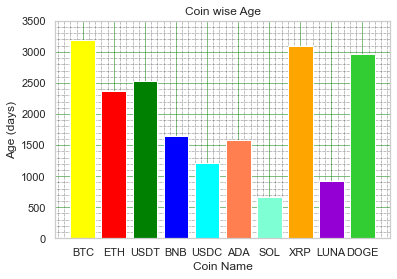

In [87]:
# Create the plot and add a label for the legend.
x_axis = Age_df["Symbol"]
y_axis = Age_df["Age_days"]

plt.bar(x_axis, y_axis, label='Coin Name', color=color_list)
# Create labels for the x and y axes.
plt.xlabel("Coin Name")
plt.ylabel("Age (days)")
# Set the y limit between 0 and 3500.
plt.ylim(0, 3500)
# Create a title.
plt.title("Coin wise Age")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Add the legend.

plt.savefig('Analysis/Coin_wise_Age_chart')

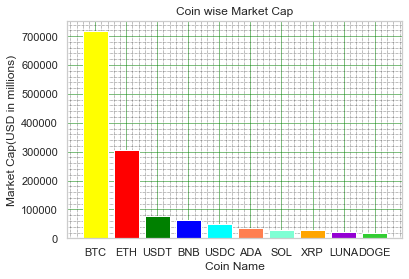

In [88]:
plt.clf()
# Create the plot and add a label for the legend.
x_axis = Top_market_cap_currencies_df["Symbol"]
y_axis = Top_market_cap_currencies_df["Market_cap"]/10**6
# plt.yscale("log")

plt.bar(x_axis, y_axis, label='Market Cap', color=color_list)
# Create labels for the x and y axes.
plt.xlabel("Coin Name")
plt.ylabel("Market Cap(USD in millions)")
# Set the y limit between 0 and max of market_cap
# plt.ylim(0, (7.529196e+11))
# Create a title.
plt.title("Coin wise Market Cap")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Add the legend.

plt.savefig('Analysis/Coinwise_Market_cap')

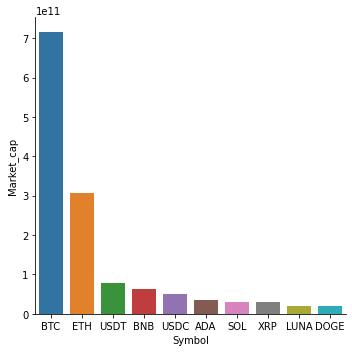

In [22]:
# Bar chart of top 10 coins as per the Market cap
sns.catplot(x='Symbol', y='Market_cap', data=Top_market_cap_currencies_df,kind='bar')

In [24]:
# create supply df
Top_coin_supply_df = Top_market_cap_currencies_df[["Symbol", "Total_supply", "Circulating_supply"]]
Top_coin_supply_df

,Symbol,Total_supply,Circulating_supply
0,BTC,1.894356e+07,1.894356e+07
1,ETH,1.193663e+08,1.193663e+08
2,USDT,8.007489e+10,7.811743e+10
3,BNB,1.651168e+08,1.651168e+08
4,USDC,4.968239e+10,4.968239e+10
5,ADA,3.402742e+10,3.356637e+10
6,SOL,5.116169e+08,3.151009e+08
7,XRP,9.998980e+10,4.773692e+10
8,LUNA,8.185280e+08,4.008599e+08
9,DOGE,1.326708e+11,1.326708e+11


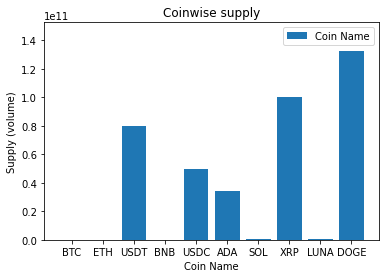

In [25]:
# Bar graph for supply of currencies
# Create the plot and add a label for the legend.
x_axis = Top_coin_supply_df["Symbol"]
y_axis = Top_coin_supply_df["Total_supply"]
plt.bar(x_axis, y_axis, label='Coin Name')
# Create labels for the x and y axes.
plt.xlabel("Coin Name")
plt.ylabel("Supply (volume)")
# Set the y limit between 0 and 3500.
plt.ylim(0, 1.526708e+11)
# Create a title.
plt.title("Coinwise supply")
# plt.minorticks_on()
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Add the legend.
plt.legend()
plt.show()

<AxesSubplot:>

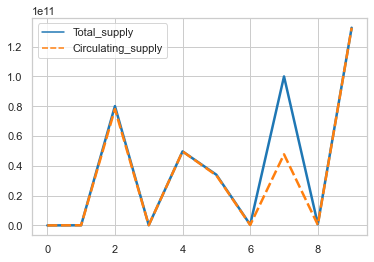

In [26]:
sns.set_theme(style="whitegrid")
data = Top_coin_supply_df
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [27]:
Top_coin_supply_df

,Symbol,Total_supply,Circulating_supply
0,BTC,1.894356e+07,1.894356e+07
1,ETH,1.193663e+08,1.193663e+08
2,USDT,8.007489e+10,7.811743e+10
3,BNB,1.651168e+08,1.651168e+08
4,USDC,4.968239e+10,4.968239e+10
5,ADA,3.402742e+10,3.356637e+10
6,SOL,5.116169e+08,3.151009e+08
7,XRP,9.998980e+10,4.773692e+10
8,LUNA,8.185280e+08,4.008599e+08
9,DOGE,1.326708e+11,1.326708e+11


C:\Users\lavin\AppData\Local\Temp/ipykernel_29868/2640487070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_coin_supply_df["Total_supply_scaled"] = Top_coin_supply_df["Total_supply"]/10**6
C:\Users\lavin\AppData\Local\Temp/ipykernel_29868/2640487070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_coin_supply_df["Circulating_supply_scaled"] = Top_coin_supply_df["Circulating_supply"]/10**6


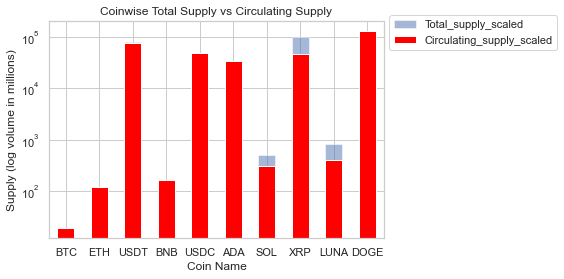

In [77]:
ax = plt.gca()
Top_coin_supply_df["Total_supply_scaled"] = Top_coin_supply_df["Total_supply"]/10**6
Top_coin_supply_df["Circulating_supply_scaled"] = Top_coin_supply_df["Circulating_supply"]/10**6
Top_coin_supply_df.plot(kind='bar',x='Symbol',y="Total_supply_scaled",ax=ax, rot=0, alpha=0.5)
Top_coin_supply_df.plot(kind='bar',x='Symbol',y="Circulating_supply_scaled", color='red', ax=ax, rot=0)

plt.yscale("log")
plt.xlabel("Coin Name")
plt.ylabel("Supply (log volume in millions)")
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.title("Coinwise Total Supply vs Circulating Supply")
plt.show()

In [29]:
#Percentage df
Top_coin_percent_df = Top_market_cap_currencies_df[["Symbol", "Percent_change_1h", "Percent_change_24h", "Percent_change_7d", "Percent_change_30d", "Percent_change_60d", "Percent_change_90d"]]
Top_coin_percent_df

,Symbol,Percent_change_1h,Percent_change_24h,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d
0,BTC,-0.769884,0.130294,7.082843,-19.630164,-34.273526,-38.596519
1,ETH,-0.968180,0.522745,5.168175,-30.574656,-45.539721,-40.483575
2,USDT,-0.020528,-0.018010,-0.003358,-0.024635,-0.052111,0.008823
3,BNB,-0.836379,-0.703239,5.175674,-25.589079,-38.741638,-27.136044
4,USDC,-0.034151,0.021299,-0.068358,-0.020731,0.010533,0.052572
5,ADA,-0.540470,0.222865,-3.783963,-21.904242,-33.000554,-46.616352
6,SOL,-1.553224,1.724446,-3.681036,-45.354464,-55.308636,-54.943395
7,XRP,-0.650111,0.026140,1.086165,-26.689119,-39.163925,-45.657856
8,LUNA,-0.911945,-1.172118,-24.195967,-40.680507,-11.812441,16.777670
9,DOGE,-0.637817,-0.125441,3.308501,-17.217073,-34.091724,-49.488777


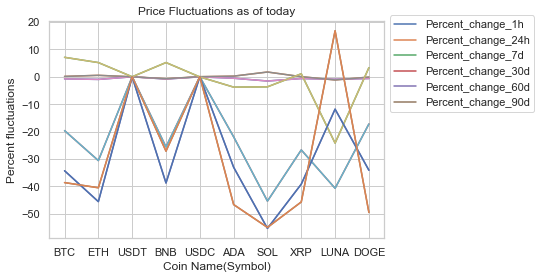

In [30]:
Top_coin_percent_df.plot()
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.title("Price Fluctuations as of today")
plt.xlabel("Coin Name(Symbol)")
plt.ylabel("Percent fluctuations")
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_1h)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_24h)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_7d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_30d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_60d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_90d)
plt.show()

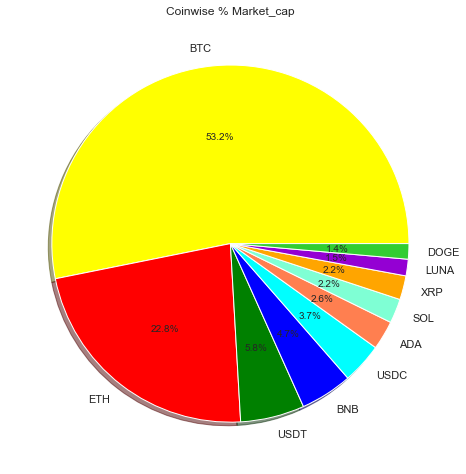

In [89]:
# Set the x-axis to a list of strings for each month.
x_axis = Top_market_cap_currencies_df["Symbol"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = Top_market_cap_currencies_df["Market_cap"]

plt.subplots(figsize=(8, 15))
plt.pie(y_axis, labels=x_axis, autopct='%.1f%%', shadow = True, colors =color_list)
plt.title("Coinwise % Market_cap")

# Save Figure
plt.savefig("analysis/Coinwise % Market_cap.png")

plt.show()

In [124]:
symbol_method = {
'BTC':'PoW',
'ETH':'PoW',
'DOGE':'PoW',
'LTC':'PoW',
'ETC':'PoW',
'XMR':'PoW',
'BSV':'PoW',
'ZEC':'PoW',
'KDA':'PoW',
'BNB':'PoS',
'ADA':'PoS',
'SOL' : 'PoS',
'DOT' : 'PoS',
'AVAX' : 'PoS',
'ATOM' : 'PoS',
'NEAR' : 'PoS',
'ALGO' : 'PoS',
'EGLD' : 'PoS',
'HNT' : 'PoS',
"LUNA" : 'dPoS',
"TRX": 'dPoS',
"XTZ": 'dPoS',
"EOS": 'dPoS',
"SCRT": 'dPoS',
"XDC": 'dPoS',
"VLX": 'dPoS',
'ICX': 'dPoS',
'HIVE': 'dPoS',
'XPRT': 'dPoS',
'USDT':'PoW/PoS',
'USDC': 'PoR',
'XRP': 'PoW/dPoS'
}

In [128]:
Top_market_cap_currencies_df['Revised_Mining_Method']= Top_market_cap_currencies_df['Symbol'].map(symbol_method)
Top_market_cap_currencies_df

,id,Coin_Name,Symbol,num_market_pairs,Launch_Date,Circulating_supply,Total_supply,cmc_rank,last_updated,Price,...,Percent_change_7d,Percent_change_30d,Percent_change_60d,Percent_change_90d,Market_cap,Market_cap_dominance,Fully_diluted_market_cap,Last_updated,Updated_Mining_Method,Revised_Mining_Method
0,1,Bitcoin,BTC,9121,2013-04-28,1.894356e+07,1.894356e+07,1,2022-01-30T01:04:00.000Z,37847.411468,...,7.082843,-19.630164,-34.273526,-38.596519,7.169646e+11,41.6303,7.947956e+11,2022-01-30 01:04:00,PoW,PoW
1,1027,Ethereum,ETH,5482,2015-08-07,1.193663e+08,1.193663e+08,2,2022-01-30T01:04:00.000Z,2571.674990,...,5.168175,-30.574656,-45.539721,-40.483575,3.069712e+11,17.8302,3.069712e+11,2022-01-30 01:04:00,PoW,PoW
2,825,Tether,USDT,27161,2015-02-25,7.811743e+10,8.007489e+10,3,2022-01-30T01:04:00.000Z,1.000298,...,-0.003358,-0.024635,-0.052111,0.008823,7.814068e+10,4.5482,8.009873e+10,2022-01-30 01:04:00,PoW/PoS,PoW/PoS
3,1839,BNB,BNB,663,2017-07-25,1.651168e+08,1.651168e+08,4,2022-01-30T01:04:00.000Z,385.219151,...,5.175674,-25.589079,-38.741638,-27.136044,6.360614e+10,3.7022,6.360614e+10,2022-01-30 01:04:00,PoS,PoS
4,3408,USD Coin,USDC,2895,2018-10-08,4.968239e+10,4.968239e+10,5,2022-01-30T01:04:00.000Z,0.999958,...,-0.068358,-0.020731,0.010533,0.052572,4.968031e+10,2.8847,4.968031e+10,2022-01-30 01:04:00,PoR,PoR
5,2010,Cardano,ADA,360,2017-10-01,3.356637e+10,3.402742e+10,6,2022-01-30T01:04:00.000Z,1.053462,...,-3.783963,-21.904242,-33.000554,-46.616352,3.536089e+10,2.0532,4.740578e+10,2022-01-30 01:04:00,PoS,PoS
6,5426,Solana,SOL,244,2020-04-10,3.151009e+08,5.116169e+08,7,2022-01-30T01:04:00.000Z,94.329757,...,-3.681036,-45.354464,-55.308636,-54.943395,2.972340e+10,1.7301,4.826070e+10,2022-01-30 01:04:00,PoS,PoS
7,52,XRP,XRP,676,2013-08-04,4.773692e+10,9.998980e+10,8,2022-01-30T01:04:00.000Z,0.612818,...,1.086165,-26.689119,-39.163925,-45.657856,2.925405e+10,1.6992,6.128182e+10,2022-01-30 01:04:00,PoW/dPoS,PoW/dPoS
8,4172,Terra,LUNA,141,2019-07-26,4.008599e+08,8.185280e+08,9,2022-01-30T01:04:00.000Z,50.466788,...,-24.195967,-40.680507,-11.812441,16.777670,2.023011e+10,1.1747,4.130848e+10,2022-01-30 01:04:00,dPoS,dPoS
9,74,Dogecoin,DOGE,444,2013-12-15,1.326708e+11,1.326708e+11,10,2022-01-30T01:04:00.000Z,0.142021,...,3.308501,-17.217073,-34.091724,-49.488777,1.884198e+10,1.0967,1.884198e+10,2022-01-30 01:04:00,PoW,PoW


# Exporting data to csv and Uploading on MongoDb

In [32]:
# exporting the dataframe to csv
final_crypto_data_df.to_csv('Latest_coinmarket_data.csv')
Top_market_cap_currencies_df.to_csv('Top_market_cap_currencies.csv')
Age_df.to_csv('Coin_Age.csv')

In [33]:
# Read in mongodb server location as client
client = MongoClient(mongo_uri,tlsCAFile=certifi.where())

In [34]:
# Find Databases
client.list_database_names()

['Kaggle_data', 'Latest_Cryptodata', 'Latest_StockMarket', 'admin', 'local']

In [35]:
# connecting to the db on MongoDb and creating collection in the db
db = client['Latest_Cryptodata']
collection = db['Latest_cryptomarket_data']

In [37]:
# drop collection to refresh with new data
collection.drop()

In [38]:
# adding dataframe to mongoDb
final_crypto_data_df.reset_index(inplace=True)
final_crypto_data_df_dict = final_crypto_data_df.to_dict("records")

In [39]:
# Insert collection
collection.insert_many(final_crypto_data_df_dict)

# Merging tables for further analyis

In [129]:
db = client["Latest_Cryptodata"]

Updated_mining_method_df = db.Updated_Mining_Methods

Updated_mining_method_df = pd.DataFrame(list(Updated_mining_method_df.find()))

Updated_mining_method_df = Updated_mining_method_df.drop(columns=['_id','level_0'], axis=1)

Updated_mining_method_df

,,CoinName,CoinTag,Algorithm,Difficulty,BlockReward,BlockCount,ProfitRatio,AvgProfitRatio,Exchange,ExchangeRate,ExchangeVolume,IsBlockExplorerOnline,IsExchangeOnline,BlockTimeInSeconds,HealthStatus,Mining Methods
0,20,Syscoin,SYS,SHA-256,1.281164e+12,80.046595,1343218.0,-46.437951,-46.810101,Bittrex,2.718000e-05,9.842947e+04,True,True,60.0,Healthy,PoW/PoS
1,15,Monacoin,MONA,Lyra2REv2,4.077988e+06,25.000000,2558072.0,-8.734014,-8.815648,Bittrex,2.015000e-05,1.608666e+03,True,True,90.0,Healthy,PoW
2,2,BitcoinCash,BCH,SHA-256,2.103348e+11,6.250000,723720.0,103.079621,104.184347,Bittrex,8.810520e-03,1.462686e+02,True,True,600.0,Healthy,PoW
3,9,Litecoin,LTC,Scrypt,1.289050e+07,12.500000,2196786.0,5.922614,6.962510,Bittrex,3.279300e-03,5.244375e+03,True,True,150.0,Healthy,PoW
4,1,Ethereum,ETH,EtHash,1.254480e+16,2.000000,14044768.0,122.951454,129.628541,hitbtc,7.483538e-02,1.454884e+04,True,True,15.0,Healthy,PoW
5,16,Dash,DASH,X11,1.244979e+08,1.553314,1608481.0,-8.957410,-11.039036,hitbtc,3.050000e-03,5.498807e+03,True,True,150.0,Healthy,PoW/PoS
6,18,DigiByte,DGB,Scrypt,1.987687e+06,665.639774,14393690.0,-28.134281,-30.907994,Bittrex,6.500000e-07,1.038407e+07,True,True,15.0,Healthy,PoW
7,21,LitecoinCash,LCC,SHA-256,2.721320e+07,93.750000,2663783.0,-47.414144,-3.258074,hitbtc,0.000000e+00,2.629000e+03,True,True,75.0,Healthy,PoW
8,17,Groestlcoin,GRS,Groestl,8.706367e+05,5.000000,3931765.0,-12.016640,-12.124792,Bittrex,1.426000e-05,3.373208e+04,True,True,60.0,Healthy,PoW/PoS
9,19,Viacoin,VIA,Scrypt,2.829743e+05,0.039062,9834467.0,-30.632403,-30.925129,Bittrex,2.790000e-06,4.505770e+04,True,True,24.0,Healthy,PoW


In [60]:
# renaming the column CoinTag
Updated_mining_method_df.rename(columns = {"CoinTag": "Symbol"}, 
          inplace = True)
Updated_mining_method_df

,,CoinName,Symbol,Algorithm,Difficulty,BlockReward,BlockCount,ProfitRatio,AvgProfitRatio,Exchange,ExchangeRate,ExchangeVolume,IsBlockExplorerOnline,IsExchangeOnline,BlockTimeInSeconds,HealthStatus,Mining Methods
0,20,Syscoin,SYS,SHA-256,1.281164e+12,80.046595,1343218.0,-46.437951,-46.810101,Bittrex,2.718000e-05,9.842947e+04,True,True,60.0,Healthy,PoW/PoS
1,15,Monacoin,MONA,Lyra2REv2,4.077988e+06,25.000000,2558072.0,-8.734014,-8.815648,Bittrex,2.015000e-05,1.608666e+03,True,True,90.0,Healthy,PoW
2,2,BitcoinCash,BCH,SHA-256,2.103348e+11,6.250000,723720.0,103.079621,104.184347,Bittrex,8.810520e-03,1.462686e+02,True,True,600.0,Healthy,PoW
3,9,Litecoin,LTC,Scrypt,1.289050e+07,12.500000,2196786.0,5.922614,6.962510,Bittrex,3.279300e-03,5.244375e+03,True,True,150.0,Healthy,PoW
4,1,Ethereum,ETH,EtHash,1.254480e+16,2.000000,14044768.0,122.951454,129.628541,hitbtc,7.483538e-02,1.454884e+04,True,True,15.0,Healthy,PoW
5,16,Dash,DASH,X11,1.244979e+08,1.553314,1608481.0,-8.957410,-11.039036,hitbtc,3.050000e-03,5.498807e+03,True,True,150.0,Healthy,PoW/PoS
6,18,DigiByte,DGB,Scrypt,1.987687e+06,665.639774,14393690.0,-28.134281,-30.907994,Bittrex,6.500000e-07,1.038407e+07,True,True,15.0,Healthy,PoW
7,21,LitecoinCash,LCC,SHA-256,2.721320e+07,93.750000,2663783.0,-47.414144,-3.258074,hitbtc,0.000000e+00,2.629000e+03,True,True,75.0,Healthy,PoW
8,17,Groestlcoin,GRS,Groestl,8.706367e+05,5.000000,3931765.0,-12.016640,-12.124792,Bittrex,1.426000e-05,3.373208e+04,True,True,60.0,Healthy,PoW/PoS
9,19,Viacoin,VIA,Scrypt,2.829743e+05,0.039062,9834467.0,-30.632403,-30.925129,Bittrex,2.790000e-06,4.505770e+04,True,True,24.0,Healthy,PoW


In [130]:
Top_Currencies_MC_Diff_Profit_Mining_combine_df = pd.merge(Top_market_cap_currencies_df, Updated_mining_method_df, how="left", on="Symbol")
Top_Currencies_MC_Diff_Profit_Mining_combine_df

KeyError: 'Symbol'

In [131]:
print(Top_Currencies_MC_Diff_Profit_Mining_combine_df.dtypes)

id                                   int64
Coin_Name                           object
Symbol                              object
num_market_pairs                     int64
Launch_Date                 datetime64[ns]
Circulating_supply                 float64
Total_supply                       float64
cmc_rank                             int64
last_updated                        object
Price                              float64
Volume_24h                         float64
Volume_change_24h                  float64
Percent_change_1h                  float64
Percent_change_24h                 float64
Percent_change_7d                  float64
Percent_change_30d                 float64
Percent_change_60d                 float64
Percent_change_90d                 float64
Market_cap                         float64
Market_cap_dominance               float64
Fully_diluted_market_cap           float64
Last_updated                datetime64[ns]
Updated_Mining_Method               object
           

In [97]:
# Replace NaN as '0'
Top_Currencies_MC_Diff_Profit_Mining_combine_df.isnull().sum().sum()
Top_Currencies_MC_Diff_Profit_Mining_combine_df.isna().sum()

id                          0
Coin_Name                   0
Symbol                      0
num_market_pairs            0
Launch_Date                 0
Circulating_supply          0
Total_supply                0
cmc_rank                    0
last_updated                0
Price                       0
Volume_24h                  0
Volume_change_24h           0
Percent_change_1h           0
Percent_change_24h          0
Percent_change_7d           0
Percent_change_30d          0
Percent_change_60d          0
Percent_change_90d          0
Market_cap                  0
Market_cap_dominance        0
Fully_diluted_market_cap    0
Last_updated                0
                            7
CoinName                    7
Algorithm                   7
Difficulty                  7
BlockReward                 7
BlockCount                  7
ProfitRatio                 7
AvgProfitRatio              7
Exchange                    7
ExchangeRate                7
ExchangeVolume              7
IsBlockExp

# Run API to extract Net Hashes per second mining for the above currencies

In [132]:
print(f"column types:\n{Top_market_cap_currencies_df.dtypes}")

column types:
id                                   int64
Coin_Name                           object
Symbol                              object
num_market_pairs                     int64
Launch_Date                 datetime64[ns]
Circulating_supply                 float64
Total_supply                       float64
cmc_rank                             int64
last_updated                        object
Price                              float64
Volume_24h                         float64
Volume_change_24h                  float64
Percent_change_1h                  float64
Percent_change_24h                 float64
Percent_change_7d                  float64
Percent_change_30d                 float64
Percent_change_60d                 float64
Percent_change_90d                 float64
Market_cap                         float64
Market_cap_dominance               float64
Fully_diluted_market_cap           float64
Last_updated                datetime64[ns]
Updated_Mining_Method               obje

In [133]:
symbol_list = Top_market_cap_currencies_df['Symbol'].tolist()
print(symbols)

['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'ADA', 'SOL', 'XRP', 'LUNA', 'DOGE']


In [134]:
api_endpoint = 'https://min-api.cryptocompare.com/data/blockchain/mining/calculator?fsyms=BTC,ETH,XRP,USDT,ADA,XMR,XLM,BUSD,LTC,DOGE&tsyms=USD&api_key='
api_endpoint += API_Key

In [135]:
symbols=symbol_list
Top_mining_df = pd.DataFrame()
api_endpoint = 'https://min-api.cryptocompare.com/data/blockchain/mining/calculator?fsyms='
api_endpoint += ','.join(symbols)+"&tsyms=USD&apikey="+API_Key
data_retrieved = requests.get(api_endpoint).json()

for name in symbols:    
    data_retrieved_json = data_retrieved['Data'][name]
    Mining_df = pd.json_normalize(data_retrieved_json)
    Top_mining_df = Top_mining_df.append(Mining_df, ignore_index = True)
    
Top_mining_df

,CoinInfo.Id,CoinInfo.Name,CoinInfo.FullName,CoinInfo.Internal,CoinInfo.ImageUrl,CoinInfo.Url,CoinInfo.NetHashesPerSecond,CoinInfo.BlockNumber,CoinInfo.BlockTime,CoinInfo.BlockReward,CoinInfo.TotalCoinsMined,CoinInfo.AssetLaunchDate,CoinInfo.MaxSupply,Price.USD
0,1182,BTC,Bitcoin,BTC,/media/37746251/btc.png,/coins/btc/overview,201464100947336630000,720999,566.000000,6.250000,1.894375e+07,2009-01-03,2.100000e+07,38002.1200
1,7605,ETH,Ethereum,ETH,/media/37746238/eth.png,/coins/eth/overview,991198927249203.75,14104914,13.371942,2.164135,1.193687e+08,2015-07-30,-1.000000e+00,2573.5900
2,171986,USDT,Tether,USDT,/media/37746338/usdt.png,/coins/usdt/overview,0,0,0.000000,0.000000,7.811743e+10,2014-10-06,-1.000000e+00,1.0000
3,204788,BNB,Binance Coin,BNB,/media/37746880/bnb.png,/coins/bnb/overview,0,0,0.000000,0.000000,1.651231e+08,2017-06-27,-1.000000e+00,383.5800
4,925809,USDC,USD Coin,USDC,/media/34835941/usdc.png,/coins/usdc/overview,0,0,0.000000,0.000000,4.967544e+10,2018-10-31,-1.000000e+00,1.0000
5,321992,ADA,Cardano,ADA,/media/37746235/ada.png,/coins/ada/overview,0,6818859,0.000000,0.000000,3.299787e+10,2017-10-05,4.500000e+10,1.0640
6,934443,SOL,Solana,SOL,/media/37747734/sol.png,/coins/sol/overview,0,106956229,0.000000,0.000000,5.144250e+08,2017-11-01,-1.000000e+00,94.8000
7,5031,XRP,XRP,XRP,/media/38553096/xrp.png,/coins/xrp/overview,0,69349628,0.000000,0.000000,9.998980e+10,2013-01-01,1.000000e+11,0.6159
8,931668,LUNA,Terra,LUNA,/media/37459367/luna.png,/coins/luna/overview,0,0,0.000000,0.000000,8.184979e+08,2018-09-10,-1.000000e+00,50.0200
9,4432,DOGE,Dogecoin,DOGE,/media/37746339/doge.png,/coins/doge/overview,307115998576640,4083224,64.000000,10000.000000,1.330047e+11,2013-12-06,-1.000000e+00,0.1421


In [136]:
# change column names
Top_mining_df= Top_mining_df.rename(columns={

    'CoinInfo.Name' : 'Symbol',
    'CoinInfo.FullName' : 'Name',
    'CoinInfo.NetHashesPerSecond' : 'NetHashesPerSecond',
    'CoinInfo.BlockNumber': 'BlockNumber',
    'CoinInfo.BlockTime' : 'BlockTime',
    'CoinInfo.BlockReward' : 'BlockReward',
    'CoinInfo.TotalCoinsMined' : 'TotalCoinsMined',
    'CoinInfo.AssetLaunchDate' : 'AssetLaunchDate',
    'CoinInfo.MaxSupply' : 'MaxSupply'})
Top_mining_df

,CoinInfo.Id,Symbol,Name,CoinInfo.Internal,CoinInfo.ImageUrl,CoinInfo.Url,NetHashesPerSecond,BlockNumber,BlockTime,BlockReward,TotalCoinsMined,AssetLaunchDate,MaxSupply,Price.USD
0,1182,BTC,Bitcoin,BTC,/media/37746251/btc.png,/coins/btc/overview,201464100947336630000,720999,566.000000,6.250000,1.894375e+07,2009-01-03,2.100000e+07,38002.1200
1,7605,ETH,Ethereum,ETH,/media/37746238/eth.png,/coins/eth/overview,991198927249203.75,14104914,13.371942,2.164135,1.193687e+08,2015-07-30,-1.000000e+00,2573.5900
2,171986,USDT,Tether,USDT,/media/37746338/usdt.png,/coins/usdt/overview,0,0,0.000000,0.000000,7.811743e+10,2014-10-06,-1.000000e+00,1.0000
3,204788,BNB,Binance Coin,BNB,/media/37746880/bnb.png,/coins/bnb/overview,0,0,0.000000,0.000000,1.651231e+08,2017-06-27,-1.000000e+00,383.5800
4,925809,USDC,USD Coin,USDC,/media/34835941/usdc.png,/coins/usdc/overview,0,0,0.000000,0.000000,4.967544e+10,2018-10-31,-1.000000e+00,1.0000
5,321992,ADA,Cardano,ADA,/media/37746235/ada.png,/coins/ada/overview,0,6818859,0.000000,0.000000,3.299787e+10,2017-10-05,4.500000e+10,1.0640
6,934443,SOL,Solana,SOL,/media/37747734/sol.png,/coins/sol/overview,0,106956229,0.000000,0.000000,5.144250e+08,2017-11-01,-1.000000e+00,94.8000
7,5031,XRP,XRP,XRP,/media/38553096/xrp.png,/coins/xrp/overview,0,69349628,0.000000,0.000000,9.998980e+10,2013-01-01,1.000000e+11,0.6159
8,931668,LUNA,Terra,LUNA,/media/37459367/luna.png,/coins/luna/overview,0,0,0.000000,0.000000,8.184979e+08,2018-09-10,-1.000000e+00,50.0200
9,4432,DOGE,Dogecoin,DOGE,/media/37746339/doge.png,/coins/doge/overview,307115998576640,4083224,64.000000,10000.000000,1.330047e+11,2013-12-06,-1.000000e+00,0.1421


# Visualizations in relation to Mining Data

In [144]:
# Calculate the percentage of drivers for each city type.
Mining_method_percent_df = Top_market_cap_currencies_df.groupby(["Revised_Mining_Method"]).sum()["Total_supply"]
Mining_method_percent_df

Revised_Mining_Method
PoR         4.968239e+10
PoS         3.470415e+10
PoW         1.328091e+11
PoW/PoS     8.007489e+10
PoW/dPoS    9.998980e+10
dPoS        8.185280e+08
Name: Total_supply, dtype: float64

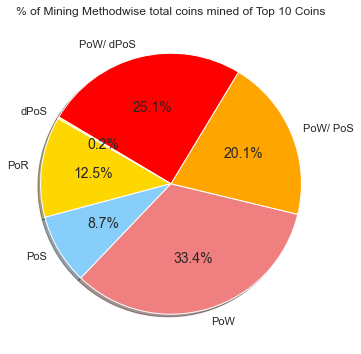

In [150]:
# Build Pie Chart of rides by city type
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(Mining_method_percent_df,
    labels=["PoR","PoS","PoW","PoW/ PoS","PoW/ dPoS","dPoS"],
    colors=["gold", "lightskyblue", "lightcoral", "orange","red","yellow"],
#     explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Mining Methodwise total coins mined of Top 10 Coins")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Mining_Methodwise_total_coins_mined_of_Top_10_Coins.png")
# Show Figure
plt.show()